<a href="https://colab.research.google.com/github/franklinperseuDS/TrabalhoModulo03/blob/main/trabalhoEstatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pacotes necessários
import pandas as pd
import numpy as np
import statistics as st
import seaborn as se
import statsmodels.stats.proportion as smp
from scipy import stats
from scipy.stats import t
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#DataFrames

In [ ]:
"""dfMicroDados =  pd.read_csv('/content/drive/Shared drives/Trabalho Estátistica/MICRODADOS_ENADE_2016.csv',sep=';',decimal=',')
dfMicroDados.shape
"""

In [ ]:
dfConceito = pd.read_excel('/content/drive/Shared drives/Trabalho Estátistica/conceito_enade2016.xlsx')

In [ ]:
dfConceito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4299 entries, 0 to 4298
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ano                        4299 non-null   int64  
 1   Código da IES              4299 non-null   int64  
 2   Nome da IES                4299 non-null   object 
 3   Sigla da IES               4299 non-null   object 
 4   Organização Acadêmica      4299 non-null   object 
 5   Categoria Administrativa   4299 non-null   object 
 6   Código do Curso            4299 non-null   int64  
 7   Código da Área             4299 non-null   int64  
 8   Área de Enquadramento      4299 non-null   object 
 9   Modalidade de Ensino       4299 non-null   object 
 10  Código do Município        4299 non-null   int64  
 11  Município do Curso         4299 non-null   object 
 12  Sigla da UF                4299 non-null   object 
 13  Concluintes Inscritos      4299 non-null   int64

## Tratamento do Dataframe 'Conceito' para as seguintes colunas
 1. codigo da IES 
 2. Sigla da IES 
 3. Organização Acadêmica 
 4. 'Município do Curso' 
 5. 'Sigla da UF' 
 6. Concluintes Inscritos 
 7. 'Concluintes Participantes 
 8. <s> 'Nota Bruta - FG', #* deixar por ultimo</s>
 9. 'Nota Padronizada - FG' 
 10. <s> 'Nota Bruta - CE', #* deixar por ultimo </s>
 11. 'Nota Padronizada - CE', 
 12. 'Conceito Enade (Contínuo)' 
 13. Conceito Enade (Faixa)
 14. Código da Área




In [ ]:
dfMedicinaC = dfConceito[dfConceito['Área de Enquadramento'] == 'MEDICINA'][['Código da Área','Código da IES','Sigla da IES','Município do Curso', 'Sigla da UF','Concluintes Inscritos', 'Concluintes Participantes','Nota Padronizada - FG','Nota Padronizada - CE','Conceito Enade (Contínuo)','Conceito Enade (Faixa)']]

In [ ]:
dfMedicinaC['Conceito Enade (Faixa)'] = dfMedicinaC['Conceito Enade (Faixa)'].astype(int)

In [ ]:
dfMedicinaC = dfMedicinaC.reset_index()

## Montando uma coluna de regiões
1 = Região Norte (NO)
norte = ['RO','AC','AM','RR' ,'PA' , 'AP' ,'TO']

2 = Região Nordeste (NE)
nordeste = ['MA','PI','CE','RN','PB','PE','AL','SE','BA']

3 = Região Sudeste (SE)
sudeste = ['MG','ES','RJ,'SP']

4 = Região Sul (SUL)
sul = ['PR','SC','RS']

5 = Região Centro-Oeste (CO)
CentroOeste = ['MS','MT','GO','DF']

In [ ]:
norte = ['RO','AC','AM','RR' ,'PA' , 'AP' ,'TO']
nordeste = ['MA','PI','CE','RN','PB','PE','AL','SE','BA']
sudeste = ['MG','ES','RJ','SP']
sul = ['PR','SC','RS']
centroOeste = ['MS','MT','GO','DF']

In [ ]:
dfMedicinaC['Regiao'] = np.nan

In [ ]:
#dfMedicinaC['Regiao'] = dfMedicinaC['Regiao'].astype(int)

In [ ]:
condicao = [np.isin(dfMedicinaC['Sigla da UF'], norte),
            np.isin(dfMedicinaC['Sigla da UF'], nordeste),
            np.isin(dfMedicinaC['Sigla da UF'], sudeste),
            np.isin(dfMedicinaC['Sigla da UF'], sul),
           np.isin(dfMedicinaC['Sigla da UF'],  centroOeste)]

resultados = [1,2,3,4,5]

dfMedicinaC['Regiao'] = np.select(condicao, resultados)

In [ ]:
dfMedicinaC.head()

,index,Código da Área,Código da IES,Sigla da IES,Município do Curso,Sigla da UF,Concluintes Inscritos,Concluintes Participantes,Nota Padronizada - FG,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa),Regiao
0,2,12,1,UFMT,CUIABÁ,MT,35,33,3.473179,2.759319,2.937784,3,5
1,8,12,2,UNB,BRASÍLIA,DF,89,85,3.436836,2.841475,2.990315,4,5
2,13,12,3,UFS,ARACAJU,SE,53,53,2.643099,2.658829,2.654896,3,2
3,17,12,4,UFAM,MANAUS,AM,36,35,4.273778,2.299221,2.792860,3,1
4,21,12,5,UFPI,TERESINA,PI,45,45,3.533455,3.565352,3.557378,4,2


In [ ]:
#Celula para verificar colunas


#ITEM A


##Notas Gerais


Text(0.5, 1.0, 'Gráfico Box-plot do conceito ENADE Nota Pardonizada CE')

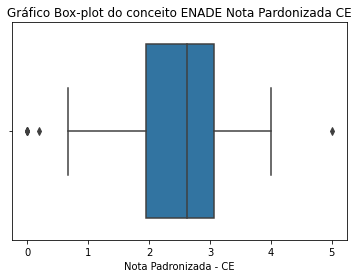

In [ ]:
se.boxplot(x = dfMedicinaC['Nota Padronizada - CE']).set_title('Gráfico Box-plot do conceito ENADE Nota Pardonizada CE')

Text(0.5, 1.0, 'Gráfico Box-plot do conceito ENADE Nota Pardonizada FG')

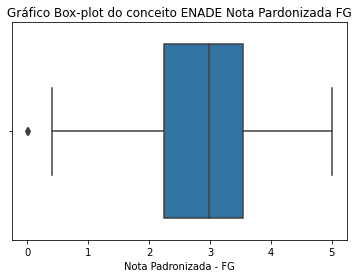

In [ ]:
se.boxplot(x = dfMedicinaC['Nota Padronizada - FG']).set_title('Gráfico Box-plot do conceito ENADE Nota Pardonizada FG')

count    176.000000
mean       3.119318
std        0.850191
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Conceito Enade (Faixa), dtype: float64

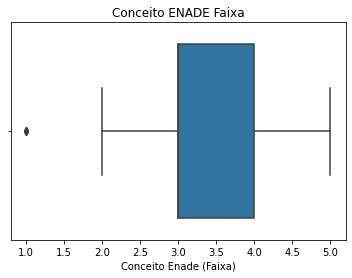

In [ ]:
#Conceito Enade (Faixa)
se.boxplot(x = dfMedicinaC['Conceito Enade (Faixa)']).set_title('Conceito ENADE Faixa')
dfMedicinaC['Conceito Enade (Faixa)'].describe()

Text(0.5, 1.0, 'Gráfico Box-plot do conceito ENADE contínuo de Medicina')

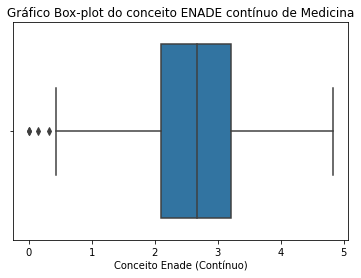

In [ ]:
se.boxplot(x = dfMedicinaC['Conceito Enade (Contínuo)']).set_title('Gráfico Box-plot do conceito ENADE contínuo de Medicina')

## Gráficos por Região



CO_REGIAO_CURSO
1. = Região Norte (NO)
2. = Região Nordeste (NE)
3. = Região Centro-Oeste (CO)
4. = Região Sul (SUL)
5. =  Região Sudeste (SE)

In [ ]:
contagemNorte = dfMedicinaC['Município do Curso'].loc[dfMedicinaC['Regiao'] == 1].count()
contagemNordeste = dfMedicinaC['Município do Curso'].loc[dfMedicinaC['Regiao'] == 2].count()
contagemSudeste = dfMedicinaC['Município do Curso'].loc[dfMedicinaC['Regiao'] == 3].count()
contagemSul = dfMedicinaC['Município do Curso'].loc[dfMedicinaC['Regiao'] == 4].count()
contagemCentroOeste=dfMedicinaC['Município do Curso'].loc[dfMedicinaC['Regiao'] == 5].count()

print ('Número de inscritos por região:')
print (f'1. Norte = {contagemNorte}')
print (f'2. Nordeste = {contagemNordeste}')
print (f'3. Sudeste = {contagemSudeste}')
print (f'4. Sul = {contagemSul}')
print (f'5. Centro-Oeste = {contagemCentroOeste}')
print(f'Total = {contagemNorte + contagemNordeste + contagemSudeste + contagemSul + contagemCentroOeste}')

Número de inscritos por região:
1. Norte = 16
2. Nordeste = 39
3. Sudeste = 78
4. Sul = 31
5. Centro-Oeste = 12
Total = 176


###Boxsplot - Nota Padronizada FG

In [ ]:
NomeDaColuna = 'Nota Padronizada - FG'

Text(0.5, 1.0, 'Nota Padronizada - FG - Região Norte')

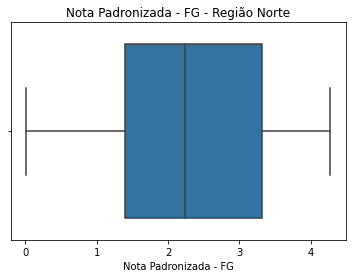

In [ ]:
se.boxplot(x = dfMedicinaC.where(dfMedicinaC['Regiao'] == 1)[NomeDaColuna]).set_title(F"{NomeDaColuna} - Região Norte")

Text(0.5, 1.0, 'Nota Padronizada - FG  - Região Nordeste')

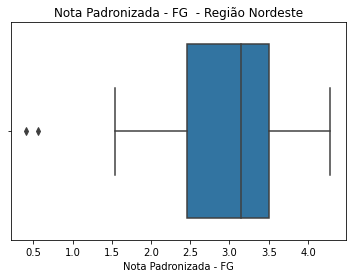

In [ ]:
se.boxplot(x = dfMedicinaC.where(dfMedicinaC['Regiao'] == 2)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Nordeste")

Text(0.5, 1.0, 'Nota Padronizada - FG  -  Região Centro-Oeste')

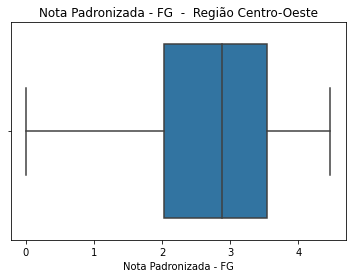

In [ ]:
se.boxplot(x = dfMedicinaC.where(dfMedicinaC['Regiao'] == 3)[NomeDaColuna]).set_title(F"{NomeDaColuna}  -  Região Centro-Oeste")

Text(0.5, 1.0, 'Nota Padronizada - FG  - Região Sul')

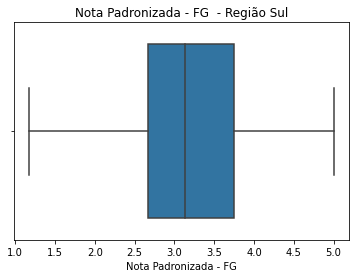

In [ ]:
se.boxplot(x = dfMedicinaC.where(dfMedicinaC['Regiao'] == 4)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sul")

Text(0.5, 1.0, 'Nota Padronizada - FG  - Região Sudeste')

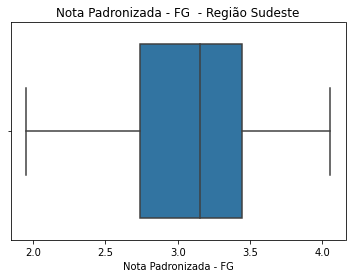

In [ ]:
se.boxplot(x = dfMedicinaC.where(dfMedicinaC['Regiao'] == 5)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sudeste")

###Histograma - Nota Padronizada - FG

Text(0.5, 1.0, 'Nota Padronizada - FG - Região Norte')

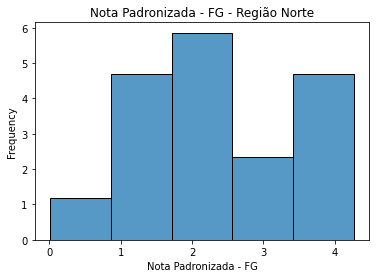

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 1), x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna} - Região Norte")

Text(0.5, 1.0, 'Nota Padronizada - FG  - Região Nordeste')

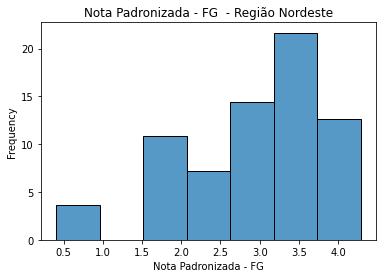

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 2),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Nordeste")

Text(0.5, 1.0, 'Nota Padronizada - FG  - Regiao Centro-Oeste')

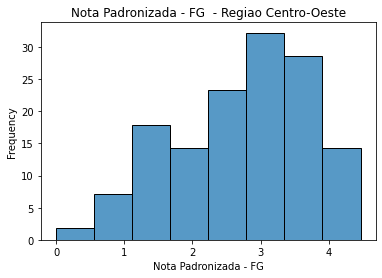

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 3),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Regiao Centro-Oeste")

Text(0.5, 1.0, 'Nota Padronizada - FG  - Região Sul')

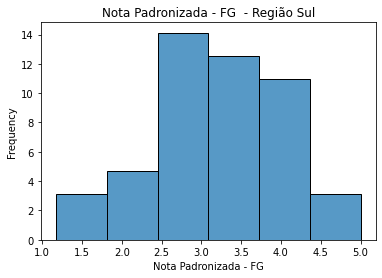

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 4),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Sul")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 5),  x= NPCE, stat='frequency').set_title(F"{NPCE}  - Região Sudeste")

NameError: ignored

###Boxsplot - Nota Padronizada - CE

In [ ]:
NomeDaColuna = 'Nota Padronizada - CE'

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 1)[NomeDaColuna]).set_title(F"{NomeDaColuna} - Região Norte")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 2)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Nordeste")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 3)[NomeDaColuna]).set_title(F"{NomeDaColuna}  -  Região Centro-Oeste")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 4)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sul")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 5)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sudeste")

###Histograma - Nota Padronizada - CE

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 1), x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna} - Região Norte")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 2),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Nordeste")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 3),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Regiao Centro-Oeste")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 4),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Sul")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 5),  x= NPCE, stat='frequency').set_title(F"{NomeDaColuna}  - Região Sudeste ")

###Boxsplot - Conceito Enade (Faixa)

In [ ]:
NomeDaColuna = 'Conceito Enade (Faixa)'

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 1)[NomeDaColuna]).set_title(F"{NomeDaColuna} - Região Norte")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 2)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Nordeste")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 3)[NomeDaColuna]).set_title(F"{NomeDaColuna}  -  Região Centro-Oeste")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 4)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sul")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 5)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sudeste")

###Histograma - Conceito Enade (Faixa)

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 1), x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna} - Região Norte")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 2),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Nordeste")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 3),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Regiao Centro-Oeste")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 4),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Sul")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 5),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Sudeste x= NPCE, stat='frequency').set_title(F"{NPCE} ")

###Boxsplot - Conceito Enade (Contínuo)

In [ ]:
NomeDaColuna = 'Conceito Enade (Contínuo)'

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 1)[NomeDaColuna]).set_title(F"{NomeDaColuna} - Região Norte")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 2)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Nordeste")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 3)[NomeDaColuna]).set_title(F"{NomeDaColuna}  -  Região Centro-Oeste")

In [ ]:
NomeDaColunase.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 4)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sul")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 5)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sudeste")

###Histograma - Conceito Enade (Faixa)

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 1), x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna} - Região Norte")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 2),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Nordeste")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 3),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Regiao Centro-Oeste")

In [ ]:
NomeDaColunase.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 4),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Sul")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 5),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Sudeste  ")

# **ITEM B**


In [ ]:
dfMedicinaC.head()

In [ ]:
# cria variáveis para as colunas
conc_inscritos = dfMedicinaC['Concluintes Inscritos']
conc_participantes = dfMedicinaC['Concluintes Participantes']
nota_fg = dfMedicinaC['Nota Padronizada - FG']
nota_ce = dfMedicinaC['Nota Padronizada - CE']
conceito_cont = dfMedicinaC['Conceito Enade (Contínuo)']
conceito_faixa = dfMedicinaC['Conceito Enade (Faixa)']

In [ ]:
# função para calcular simetria
def calc_simetria(media, mediana):
  if (media > mediana):
    return 'ASSIMÉTRICA POSITIVA'
  elif (media < mediana):
    return 'ASSIMÉTRICA NEGATIVA'
  else:
    return 'SIMÉTRICA'

## **B - Variável 'Concluintes Inscritos'**

In [ ]:
# Info
conc_inscritos.describe()

In [ ]:
# Criar lista
inscritos_array = np.array(conc_inscritos, dtype = float)
print (inscritos_array)

In [ ]:
# Média
ci_media = st.mean(inscritos_array)
ci_media

90.01704545454545

In [ ]:
# Mediana
ci_mediana = st.median(inscritos_array)
ci_mediana

In [ ]:
# Moda
ci_moda = st.mode(inscritos_array) # st.multimode(inscritos_array)
ci_moda

In [ ]:
# Desvio-padrão
ci_desvio_padrao = np.std(inscritos_array)
ci_desvio_padrao

47.906688946493844

In [ ]:
# Coeficiente de variação
ci_coef_variacao = np.var(inscritos_array)
ci_coef_variacao

In [ ]:
# Simetria
print("A variável é", calc_simetria(ci_media, ci_mediana))
print()
se.boxplot(x = conc_inscritos).set_title('Gráfico Box-plot dos concluintes inscritos')

## **B - Variável 'Concluintes Participantes'**

In [ ]:
# Info
conc_participantes.describe()

In [ ]:
# Criar lista
participantes_array = np.array(conc_participantes, dtype = float)
print (participantes_array)

In [ ]:
# Média
cp_media = st.mean(participantes_array)
cp_media

88.24431818181819

In [ ]:
# Mediana
cp_mediana = st.median(participantes_array)
cp_mediana

In [ ]:
# Moda
cp_moda = st.mode(participantes_array) # st.multimode(participantes_array)
cp_moda

In [ ]:
# Desvio-padrão
cp_desvio_padrao = np.std(participantes_array)
cp_desvio_padrao

46.93881984696711

In [ ]:
# Coeficiente de variação
cp_coef_variacao = np.var(participantes_array)
cp_coef_variacao

In [ ]:
# Simetria
print("A variável é", calc_simetria(cp_media, cp_mediana))
print()
se.boxplot(x = conc_participantes).set_title('Gráfico Box-plot dos concluintes participantes')

## **B - Variável 'Nota Padronizada - FG'**

In [ ]:
# Info
nota_fg.describe()

In [ ]:
# Criar lista
nota_fg_array = np.array(nota_fg, dtype = float)
print (nota_fg_array)

In [ ]:
# Média
fg_media = st.mean(nota_fg_array)
fg_media

In [ ]:
# Mediana
fg_mediana = st.median(nota_fg_array)
fg_mediana

In [ ]:
# Moda
#fg_moda = st.mode(nota_fg_array) # st.multimode(nota_fg_array)
#fg_moda
print('Não tem moda, pois nenhum valor se repete.')

In [ ]:
# Desvio-padrão
fg_desvio_padrao = np.std(nota_fg_array)
fg_desvio_padrao

In [ ]:
# Coeficiente de variação
fg_coef_variacao = np.var(nota_fg_array)
fg_coef_variacao

In [ ]:
# Simetria
print("A variável é", calc_simetria(fg_media, fg_mediana))
print()
se.boxplot(x = nota_fg, ).set_title('Gráfico Box-plot da nota padronizada (FG)')

## **B - Variável 'Nota Padronizada - CE'**

In [ ]:
# Info
nota_ce.describe()

In [ ]:
# Criar lista
nota_ce_array = np.array(nota_ce, dtype = float)
print (nota_ce_array)

In [ ]:
# Média
ce_media = st.mean(nota_ce_array)
ce_media

In [ ]:
# Mediana
ce_mediana = st.median(nota_ce_array)
ce_mediana

In [ ]:
# Moda
ce_moda = st.mode(nota_ce_array) # st.multimode(nota_ce_array)
ce_moda

In [ ]:
# Desvio-padrão
ce_desvio_padrao = np.std(nota_ce_array)
ce_desvio_padrao

In [ ]:
# Coeficiente de variação
ce_coef_variacao = np.var(nota_ce_array)
ce_coef_variacao

In [ ]:
# Simetria
print("A variável é", calc_simetria(ce_media, ce_mediana))
print()
se.boxplot(x = nota_ce).set_title('Gráfico Box-plot da nota padronizada (CE)')

## **B - Variável 'Conceito Enade - Contínuo'**

In [ ]:
# Info
conceito_cont.describe()

In [ ]:
# Criar lista
conceito_cont_array = np.array(conceito_cont, dtype = float)
print (conceito_cont_array)

In [ ]:
# Média
cc_media = st.mean(conceito_cont_array)
cc_media

In [ ]:
# Mediana
cc_mediana = st.median(conceito_cont_array)
cc_mediana

In [ ]:
# Moda
#cc_moda = st.mode(conceito_cont_array) # st.multimode(conceito_cont_array)
#cc_moda
print('Não tem moda, pois nenhum valor se repete.')

In [ ]:
# Desvio-padrão
cc_desvio_padrao = np.std(conceito_cont_array)
cc_desvio_padrao

In [ ]:
# Coeficiente de variação
cc_coef_variacao = np.var(conceito_cont_array)
cc_coef_variacao

In [ ]:
# Simetria
print("A variável é", calc_simetria(cc_media, cc_mediana))
print()
se.boxplot(x = conceito_cont).set_title('Gráfico Box-plot da Conceito Endade (Contínuo)')

## **B - Variável 'Conceito Enade - Faixa'**

In [ ]:
# Info
conceito_faixa.describe()

In [ ]:
# Criar lista
conceito_faixa_array = np.array(conceito_faixa, dtype = float)
print (conceito_faixa_array)

In [ ]:
# Média
cf_media = st.mean(conceito_faixa_array)
cf_media

In [ ]:
# Mediana
cf_mediana = st.median(conceito_faixa_array)
cf_mediana

In [ ]:
# Moda
cf_moda = st.mode(conceito_faixa_array) # st.multimode(conceito_faixa_array)
cf_moda

In [ ]:
# Desvio-padrão
cf_desvio_padrao = np.std(conceito_faixa_array)
cf_desvio_padrao

In [ ]:
# Coeficiente de variação
cf_coef_variacao = np.var(conceito_faixa_array)
cf_coef_variacao

In [ ]:
# Simetria
print("A variável é", calc_simetria(cf_media, cf_mediana))
print()
se.boxplot(x = conceito_faixa).set_title('Gráfico Box-plot da Conceito Endade (Faixa)')

# ITEM C

## Notas Gerais

### C- Concluintes Inscritos

In [ ]:
dfMedicinaC.head()

In [ ]:
media_ci = dfMedicinaC['Concluintes Inscritos'].mean()
dp_ci = dfMedicinaC['Concluintes Inscritos'].std()
CV_ci = dp_ci/media_ci
print('CV_ci = ',round(CV_ci,3))
 

CV_ci =  0.534


### C - Concluintes Participantes

In [ ]:
media_cp = dfMedicinaC['Concluintes Participantes'].mean()
dp_cp = dfMedicinaC['Concluintes Participantes'].std()
CV_cp = dp_cp/media_cp
print('CV_cp = ',round(CV_cp,3))

CV_cp =  0.533


### C - Variável Nota Padronizada - FG

In [ ]:
media_fg = dfMedicinaC['Nota Padronizada - FG'].mean()
dp_fg = dfMedicinaC['Nota Padronizada - FG'].std()
CV_fg = dp_fg/media_fg
print('CV_fg = ',round(CV_fg,3))


CV_fg =  0.352


In [ ]:
# Simetria
#se.boxplot(x = dfMedicinaC['Nota Padronizada - FG'], ).set_title('Gráfico Box-plot das Notas Padronizadas FG')

### C - Variável Nota Padronizada - CE

In [ ]:
media_ce = dfMedicinaC['Nota Padronizada - CE'].mean()
dp_ce = dfMedicinaC['Nota Padronizada - CE'].std()
CV_ce = dp_ce/media_ce
print('CV_ce = ',round(CV_ce,3))


CV_ce =  0.339


In [ ]:
#se.boxplot(x = dfMedicinaC['Nota Padronizada - CE'], ).set_title('Gráfico Box-plot das Notas Padronizadas CE')

### C - Variável Conceito Enade (Contínuo)

In [ ]:
media_CEC = dfMedicinaC['Conceito Enade (Contínuo)'].mean()
dp_CEC = dfMedicinaC['Conceito Enade (Contínuo)'].std()
CV_CEC = dp_CEC/media_CEC
print('CV_CEC = ',round(CV_CEC,3))


CV_CEC =  0.321


In [ ]:
#se.boxplot(x = dfMedicinaC['Conceito Enade (Contínuo)'], ).set_title('Gráfico Box-plot da Variável Conceito Enade (Contínuo)')

### C - Variável Conceito Enade (Faixa)




In [ ]:
media_CEF = dfMedicinaC['Conceito Enade (Faixa)'].mean()
dp_CEF = dfMedicinaC['Conceito Enade (Faixa)'].std()
CV_CEF = dp_CEF/media_CEF
print('CV_CEF = ',round(CV_CEF,3))


CV_CEF =  0.273


In [ ]:
#se.boxplot(x = dfMedicinaC['Conceito Enade (Faixa)'], ).set_title('Gráfico Box-plot da Variável Conceito Enade (Faixa)')

In [ ]:
# Quem é mais homogeneo
H = [CV_CEF,CV_CEC,CV_ce,CV_fg,CV_cp,CV_ci,]
print(min(H))

0.2725566660654716


### C- Verificar normalidade

In [ ]:
#funçao que verifica normalidade
# função para calcular simetria
def normalidade(h):
  h0 = stats.shapiro(h)
  if (h0[1] > 0.5):
    return 'normalizados'
  else:
    return 'não normalizados'

In [ ]:
print('Valores de conc_inscritos são ', normalidade(conc_inscritos))
print('Valores de conc_participantes são ', normalidade(conc_participantes))
print('Valores de nota_fg são ', normalidade(nota_fg))
print('Valores de nota_ce são ', normalidade(nota_ce))
print('Valores de conceito_cont são ', normalidade(conceito_cont))
print('Valores de conceito_faixa são ', normalidade(conceito_faixa))


Valores de conc_inscritos são  não normalizados
Valores de conc_participantes são  não normalizados
Valores de nota_fg são  não normalizados
Valores de nota_ce são  não normalizados
Valores de conceito_cont são  não normalizados
Valores de conceito_faixa são  não normalizados


## Por Regiões

In [ ]:
rNO = dfMedicinaC.loc[dfMedicinaC['Regiao'] == 1]
rNE = dfMedicinaC.loc[dfMedicinaC['Regiao'] == 2]
rSE = dfMedicinaC.loc[dfMedicinaC['Regiao'] == 3]
rSU = dfMedicinaC.loc[dfMedicinaC['Regiao'] == 4]
rCO = dfMedicinaC.loc[dfMedicinaC['Regiao'] == 5]

### C- Concluintes Inscritos

In [ ]:
df = dfMedicinaC.groupby(['Regiao']).agg(media_ci_R=('Concluintes Inscritos',np.mean),dp_ci_R=('Concluintes Inscritos',np.std))
df['CV_ci_R'] = df['dp_ci_R']/df['media_ci_R']
print(df)

        media_ci_R    dp_ci_R   CV_ci_R
Regiao                                 
1        75.750000  43.523940  0.574573
2        86.256410  54.370424  0.630335
3       101.653846  51.399335  0.505631
4        76.774194  32.599294  0.424613
5        79.833333  24.902842  0.311935


In [ ]:
df[df['CV_ci_R']==min(df['CV_ci_R'])] 

,media_ci_R,dp_ci_R,CV_ci_R
Regiao,,,
5,79.833333,24.902842,0.311935


### C - Concluintes Participantes

In [ ]:
df = dfMedicinaC.groupby(['Regiao']).agg(media_cp_R=('Concluintes Participantes',np.mean),dp_cp_R=('Concluintes Participantes',np.std))
df['CV_cp_R'] = df['dp_cp_R']/df['media_cp_R']
print(df)

        media_cp_R    dp_cp_R   CV_cp_R
Regiao                                 
1        73.937500  41.803459  0.565389
2        83.384615  52.651593  0.631431
3       100.333333  50.543967  0.503760
4        76.129032  32.067369  0.421224
5        75.833333  24.609065  0.324515


In [ ]:
df[df['CV_cp_R']==min(df['CV_cp_R'])]

,media_cp_R,dp_cp_R,CV_cp_R
Regiao,,,
5,75.833333,24.609065,0.324515


### C - Variável Nota Padronizada - FG

In [ ]:
df = dfMedicinaC.groupby(['Regiao']).agg(media_fg_R=('Nota Padronizada - FG',np.mean),dp_fg_R=('Nota Padronizada - FG',np.std))
df['CV_fg_R'] = df['dp_fg_R']/df['media_fg_R']
print(df)

        media_fg_R   dp_fg_R   CV_fg_R
Regiao                                
1         2.356935  1.271595  0.539512
2         2.896809  0.946093  0.326598
3         2.711669  1.023436  0.377419
4         3.197517  0.839710  0.262613
5         3.040652  0.625663  0.205766


In [ ]:
df[df['CV_fg_R']==min(df['CV_fg_R'])]

,media_fg_R,dp_fg_R,CV_fg_R
Regiao,,,
5,3.040652,0.625663,0.205766


### C - Variável Nota Padronizada - CE

In [ ]:
df = dfMedicinaC.groupby(['Regiao']).agg(media_ce_R=('Nota Padronizada - CE',np.mean),dp_ce_R=('Nota Padronizada - CE',np.std))
df['CV_ce_R'] = df['dp_ce_R']/df['media_ce_R']
print(df)

        media_ce_R   dp_ce_R   CV_ce_R
Regiao                                
1         1.958728  0.998773  0.509909
2         2.615184  0.705564  0.269795
3         2.379903  0.893009  0.375229
4         2.844126  0.634229  0.222996
5         2.676164  0.828531  0.309597


In [ ]:
df[df['CV_ce_R']==min(df['CV_ce_R'])]

,media_ce_R,dp_ce_R,CV_ce_R
Regiao,,,
4,2.844126,0.634229,0.222996


### C - Variável Conceito Enade (Contínuo)

In [ ]:
df = dfMedicinaC.groupby(['Regiao']).agg(media_CEC_R=('Conceito Enade (Contínuo)',np.mean),dp_CEC_R=('Conceito Enade (Contínuo)',np.std))
df['CV_CEC_R'] = df['dp_CEC_R']/df['media_CEC_R']
print(df)

        media_CEC_R  dp_CEC_R  CV_CEC_R
Regiao                                 
1          2.058280  1.023794  0.497403
2          2.685591  0.683669  0.254570
3          2.462845  0.875891  0.355642
4          2.932474  0.619170  0.211142
5          2.767286  0.734972  0.265593


In [ ]:
df[df['CV_CEC_R']==min(df['CV_CEC_R'])]

,media_CEC_R,dp_CEC_R,CV_CEC_R
Regiao,,,
4,2.932474,0.61917,0.211142


### C - Variável Conceito Enade (Faixa)

In [ ]:
df = dfMedicinaC.groupby(['Regiao']).agg(media_CEF_R=('Conceito Enade (Faixa)',np.mean),dp_CEF_R=('Conceito Enade (Faixa)',np.std))
df['CV_CEF_R'] = df['dp_CEF_R']/df['media_CEF_R']
print(df)

        media_CEF_R  dp_CEF_R  CV_CEF_R
Regiao                                 
1          2.625000  1.087811  0.414404
2          3.179487  0.756439  0.237912
3          3.012821  0.875253  0.290509
4          3.516129  0.625618  0.177928
5          3.250000  0.753778  0.231932


In [ ]:
df[df['CV_CEF_R']==min(df['CV_CEF_R'])]

,media_CEF_R,dp_CEF_R,CV_CEF_R
Regiao,,,
4,3.516129,0.625618,0.177928


### C- Verificar normalidade

Concluintes Escritos
Norte:        não normalizados
Nordeste:     não normalizados
Sudeste:      não normalizados
Sul:          não normalizados
Centro-Oeste: normalizados



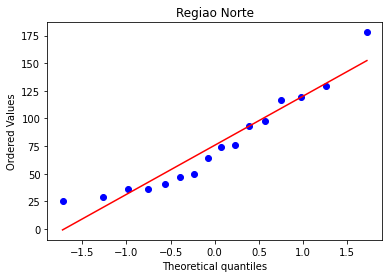

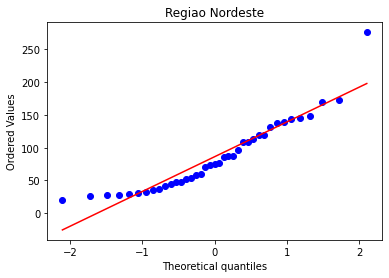

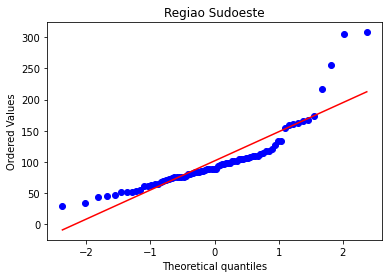

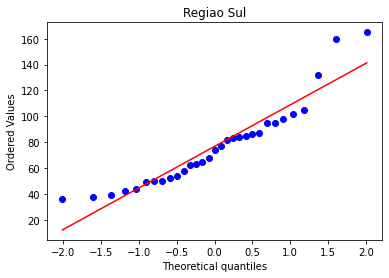

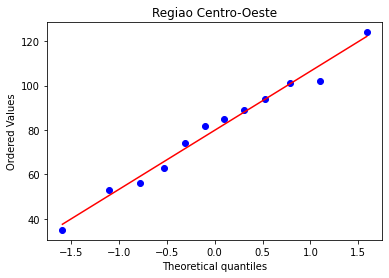

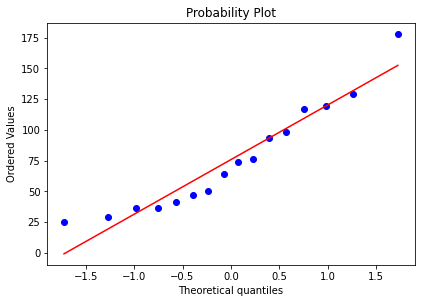

In [ ]:
print('Concluintes Escritos')
print('Norte:        '+normalidade(rNO['Concluintes Inscritos']))
print('Nordeste:     '+normalidade(rNE['Concluintes Inscritos']))
print('Sudeste:      '+normalidade(rSE['Concluintes Inscritos']))
print('Sul:          '+normalidade(rSU['Concluintes Inscritos']))
print('Centro-Oeste: '+normalidade(rCO['Concluintes Inscritos']))

print()

fig, ax = plt.subplots()
stats.probplot(rNO['Concluintes Inscritos'], fit=True,   plot=ax)
plt.title('Regiao Norte')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rNE['Concluintes Inscritos'], fit=True,   plot=ax)
plt.title('Regiao Nordeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSE['Concluintes Inscritos'], fit=True,   plot=ax)
plt.title('Regiao Sudoeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSU['Concluintes Inscritos'], fit=True,   plot=ax)
plt.title('Regiao Sul')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rCO['Concluintes Inscritos'], fit=True,   plot=ax)
plt.title('Regiao Centro-Oeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rNO['Concluintes Inscritos'], fit=True,   plot=ax)
#plt.show()

plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
plt.show()


Concluintes Participantes
Norte:        não normalizados
Nordeste:     não normalizados
Sudeste:      não normalizados
Sul:          não normalizados
Centro-Oeste: normalizados



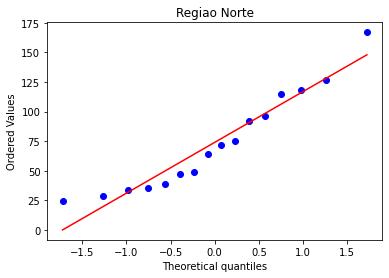

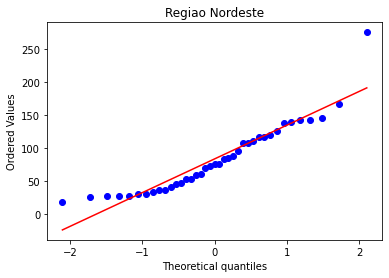

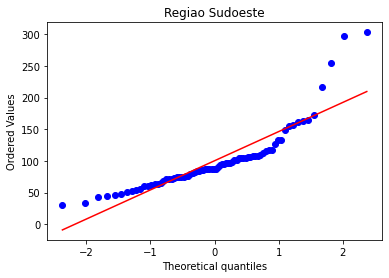

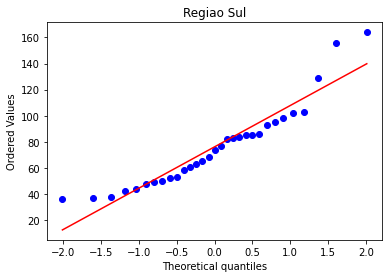

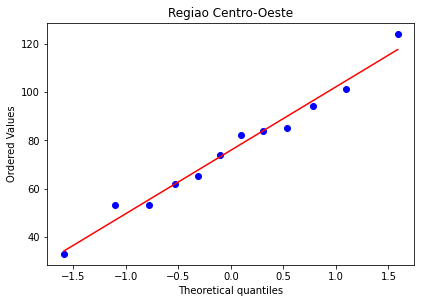

In [ ]:
print('Concluintes Participantes')
print('Norte:        '+normalidade(rNO['Concluintes Participantes']))
print('Nordeste:     '+normalidade(rNE['Concluintes Participantes']))
print('Sudeste:      '+normalidade(rSE['Concluintes Participantes']))
print('Sul:          '+normalidade(rSU['Concluintes Participantes']))
print('Centro-Oeste: '+normalidade(rCO['Concluintes Participantes']))
print()

fig, ax = plt.subplots()
stats.probplot(rNO['Concluintes Participantes'], fit=True,   plot=ax)
plt.title('Regiao Norte')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rNE['Concluintes Participantes'], fit=True,   plot=ax)
plt.title('Regiao Nordeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSE['Concluintes Participantes'], fit=True,   plot=ax)
plt.title('Regiao Sudoeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSU['Concluintes Participantes'], fit=True,   plot=ax)
plt.title('Regiao Sul')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rCO['Concluintes Participantes'], fit=True,   plot=ax)
plt.title('Regiao Centro-Oeste')
#plt.show()


plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
plt.show()

Variável Nota Padronizada - FG
Norte:        normalizados
Nordeste:     não normalizados
Sudeste:      não normalizados
Sul:          normalizados
Centro-Oeste: não normalizados



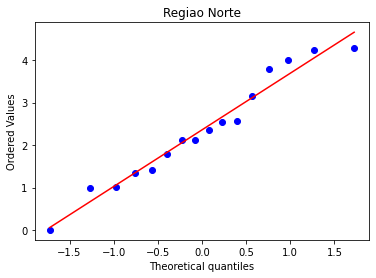

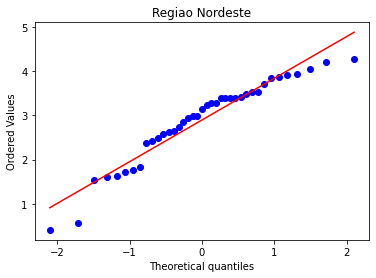

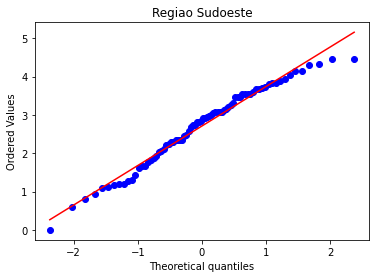

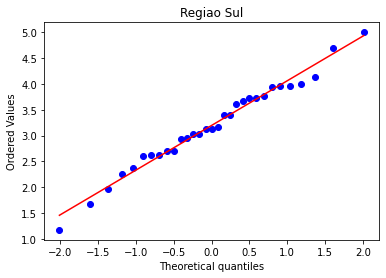

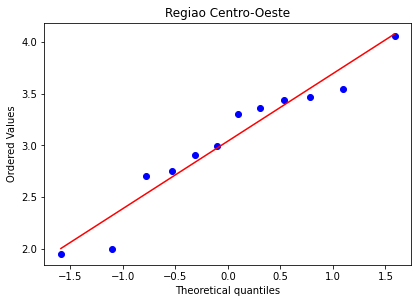

In [ ]:
print('Variável Nota Padronizada - FG')
print('Norte:        '+normalidade(rNO['Nota Padronizada - FG']))
print('Nordeste:     '+normalidade(rNE['Nota Padronizada - FG']))
print('Sudeste:      '+normalidade(rSE['Nota Padronizada - FG']))
print('Sul:          '+normalidade(rSU['Nota Padronizada - FG']))
print('Centro-Oeste: '+normalidade(rCO['Nota Padronizada - FG']))

print()

fig, ax = plt.subplots()
stats.probplot(rNO['Nota Padronizada - FG'], fit=True,   plot=ax)
plt.title('Regiao Norte')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rNE['Nota Padronizada - FG'], fit=True,   plot=ax)
plt.title('Regiao Nordeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSE['Nota Padronizada - FG'], fit=True,   plot=ax)
plt.title('Regiao Sudoeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSU['Nota Padronizada - FG'], fit=True,   plot=ax)
plt.title('Regiao Sul')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rCO['Nota Padronizada - FG'], fit=True,   plot=ax)
plt.title('Regiao Centro-Oeste')
#plt.show()


plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
plt.show()

Variável Nota Padronizada - CE
Norte:        não normalizados
Nordeste:     normalizados
Sudeste:      não normalizados
Sul:          não normalizados
Centro-Oeste: normalizados



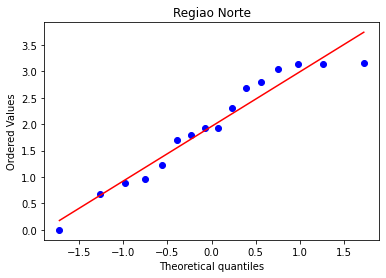

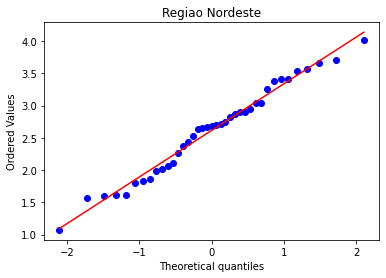

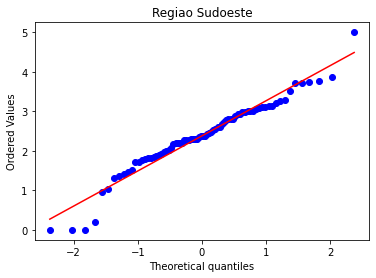

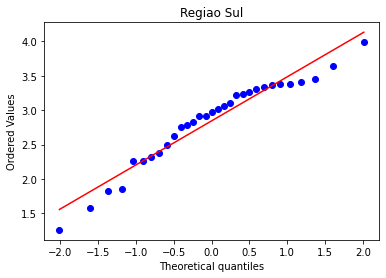

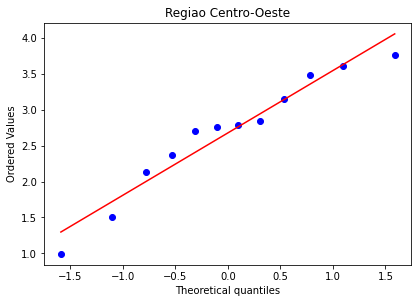

In [ ]:
print('Variável Nota Padronizada - CE')
print('Norte:        '+normalidade(rNO['Nota Padronizada - CE']))
print('Nordeste:     '+normalidade(rNE['Nota Padronizada - CE']))
print('Sudeste:      '+normalidade(rSE['Nota Padronizada - CE']))
print('Sul:          '+normalidade(rSU['Nota Padronizada - CE']))
print('Centro-Oeste: '+normalidade(rCO['Nota Padronizada - CE']))

print()

fig, ax = plt.subplots()
stats.probplot(rNO['Nota Padronizada - CE'], fit=True,   plot=ax)
plt.title('Regiao Norte')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rNE['Nota Padronizada - CE'], fit=True,   plot=ax)
plt.title('Regiao Nordeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSE['Nota Padronizada - CE'], fit=True,   plot=ax)
plt.title('Regiao Sudoeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSU['Nota Padronizada - CE'], fit=True,   plot=ax)
plt.title('Regiao Sul')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rCO['Nota Padronizada - CE'], fit=True,   plot=ax)
plt.title('Regiao Centro-Oeste')
#plt.show()


plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
plt.show()

Variável Conceito Enade (Contínuo)
Norte:        normalizados
Nordeste:     não normalizados
Sudeste:      não normalizados
Sul:          não normalizados
Centro-Oeste: não normalizados



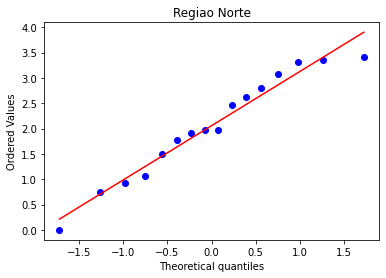

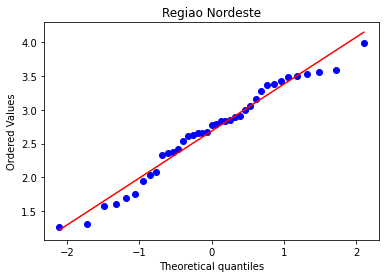

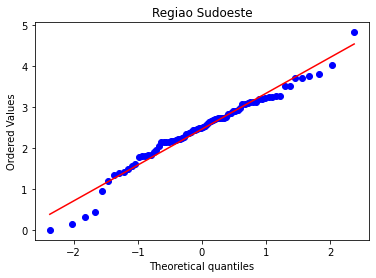

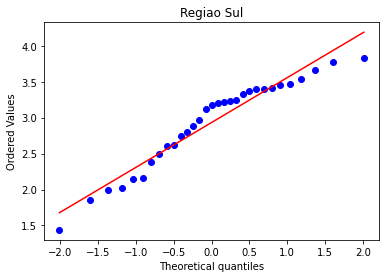

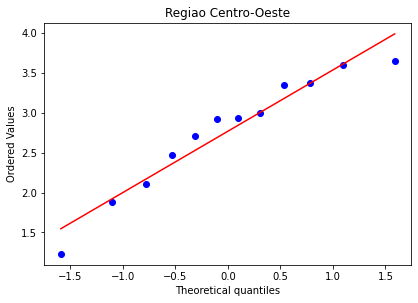

In [ ]:
print('Variável Conceito Enade (Contínuo)')
print('Norte:        '+normalidade(rNO['Conceito Enade (Contínuo)']))
print('Nordeste:     '+normalidade(rNE['Conceito Enade (Contínuo)']))
print('Sudeste:      '+normalidade(rSE['Conceito Enade (Contínuo)']))
print('Sul:          '+normalidade(rSU['Conceito Enade (Contínuo)']))
print('Centro-Oeste: '+normalidade(rCO['Conceito Enade (Contínuo)']))

print()

fig, ax = plt.subplots()
stats.probplot(rNO['Conceito Enade (Contínuo)'], fit=True,   plot=ax)
plt.title('Regiao Norte')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rNE['Conceito Enade (Contínuo)'], fit=True,   plot=ax)
plt.title('Regiao Nordeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSE['Conceito Enade (Contínuo)'], fit=True,   plot=ax)
plt.title('Regiao Sudoeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSU['Conceito Enade (Contínuo)'], fit=True,   plot=ax)
plt.title('Regiao Sul')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rCO['Conceito Enade (Contínuo)'], fit=True,   plot=ax)
plt.title('Regiao Centro-Oeste')
#plt.show()


plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
plt.show()

Variável Conceito Enade (Faixa)
Norte:        não normalizados
Nordeste:     não normalizados
Sudeste:      não normalizados
Sul:          não normalizados
Centro-Oeste: não normalizados



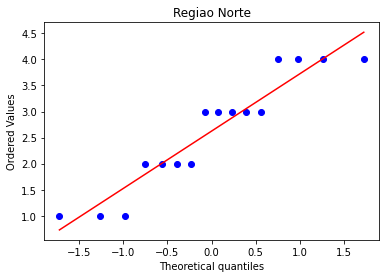

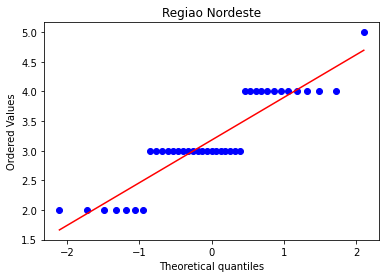

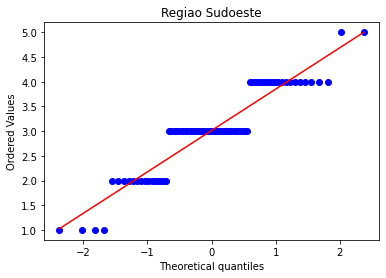

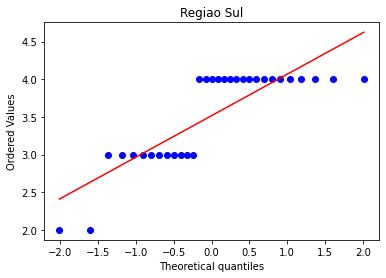

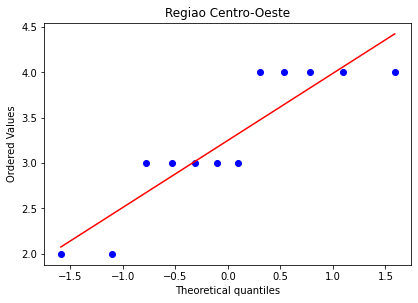

In [ ]:
print('Variável Conceito Enade (Faixa)')
print('Norte:        '+normalidade(rNO['Conceito Enade (Faixa)']))
print('Nordeste:     '+normalidade(rNE['Conceito Enade (Faixa)']))
print('Sudeste:      '+normalidade(rSE['Conceito Enade (Faixa)']))
print('Sul:          '+normalidade(rSU['Conceito Enade (Faixa)']))
print('Centro-Oeste: '+normalidade(rCO['Conceito Enade (Faixa)']))

print()

fig, ax = plt.subplots()
stats.probplot(rNO['Conceito Enade (Faixa)'], fit=True,   plot=ax)
plt.title('Regiao Norte')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rNE['Conceito Enade (Faixa)'], fit=True,   plot=ax)
plt.title('Regiao Nordeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSE['Conceito Enade (Faixa)'], fit=True,   plot=ax)
plt.title('Regiao Sudoeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSU['Conceito Enade (Faixa)'], fit=True,   plot=ax)
plt.title('Regiao Sul')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rCO['Conceito Enade (Faixa)'], fit=True,   plot=ax)
plt.title('Regiao Centro-Oeste')
#plt.show()


plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
plt.show()

In [ ]:
ax = se.boxplot(x = 'Nota Padronizada - FG', data = rNO).set_title('Nota Padroniza FG - Regiao Norte')

In [ ]:
ax = se.boxplot(x = 'Nota Padronizada - FG', data = rNE).set_title('Nota Padroniza FG - Regiao Nordeste')

In [ ]:
ax = se.boxplot(x = 'Nota Padronizada - FG', data = rSE).set_title('Nota Padroniza FG - Regiao Sudeste')

In [ ]:
ax = se.boxplot(x = 'Nota Padronizada - FG', data = rSU).set_title('Nota Padroniza FG - Regiao Sul')

In [ ]:
ax = se.boxplot(x = 'Nota Padronizada - FG', data = rCO).set_title('Nota Padroniza FG - Regiao Centro-Oeste')

#**ITEM D**

In [ ]:
dfMedicina = dfConceito[dfConceito['Código da Área'] == 12]
dfMedicina.head()

,Ano,Código da IES,Nome da IES,Sigla da IES,Organização Acadêmica,Categoria Administrativa,Código do Curso,Código da Área,Área de Enquadramento,Modalidade de Ensino,Código do Município,Município do Curso,Sigla da UF,Concluintes Inscritos,Concluintes Participantes,Nota Bruta - FG,Nota Padronizada - FG,Nota Bruta - CE,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa)
2,2016,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Universidade,Pessoa Jurídica de Direito Público - Federal,12,12,MEDICINA,Educação Presencial,5103403,CUIABÁ,MT,35,33,63.166668,3.473179,68.506058,2.759319,2.937784,3
8,2016,2,UNIVERSIDADE DE BRASÍLIA,UNB,Universidade,Pessoa Jurídica de Direito Público - Federal,140,12,MEDICINA,Educação Presencial,5300108,BRASÍLIA,DF,89,85,63.005882,3.436836,68.930588,2.841475,2.990315,4
13,2016,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,Universidade,Pessoa Jurídica de Direito Público - Federal,303,12,MEDICINA,Educação Presencial,2800308,ARACAJU,SE,53,53,59.494339,2.643099,67.986794,2.658829,2.654896,3
17,2016,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Universidade,Pessoa Jurídica de Direito Público - Federal,389,12,MEDICINA,Educação Presencial,1302603,MANAUS,AM,36,35,66.708572,4.273778,66.128571,2.299221,2.792860,3
21,2016,5,UNIVERSIDADE FEDERAL DO PIAUÍ,UFPI,Universidade,Pessoa Jurídica de Direito Público - Federal,484,12,MEDICINA,Educação Presencial,2211001,TERESINA,PI,45,45,63.433334,3.533455,72.671112,3.565352,3.557378,4


In [ ]:
dfMedicina["Conceito Enade (Faixa)"] = pd.to_numeric(dfMedicina['Conceito Enade (Faixa)'], errors='coerce')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
qtdMedicina = len(dfMedicina)
print("Quantidade de Universidades com medicina: ", qtdMedicina)

MediaConceitoEnade = dfMedicina['Conceito Enade (Faixa)'].mean() 
print("Média geral(Medicina) do conceito ENADE: ", round(MediaConceitoEnade,3))

DesvioConceitoEnade = dfMedicina.loc[:,"Conceito Enade (Faixa)"].std()
print("Desvio padrão geral(Medicina) do conceito ENADE: ", round(DesvioConceitoEnade,3))

Quantidade de Universidades com medicina:  176
Média geral(Medicina) do conceito ENADE:  3.119
Desvio padrão geral(Medicina) do conceito ENADE:  0.85


In [ ]:
#Intervalo de Confiança ao nível de 95%;
print("Intervalo de Confiança ao nível de 95% para média quando a variância é desconhecida")
inf,sup = t.interval(0.95, qtdMedicina-1, loc=MediaConceitoEnade, scale=DesvioConceitoEnade/np.sqrt(qtdMedicina))
print ('Limite inferior 95%:', round(inf,3))
print ('Limite superior 95%:', round(sup,3))


Intervalo de Confiança ao nível de 95% para média quando a variância é desconhecida
Limite inferior 95%: 2.993
Limite superior 95%: 3.246


In [ ]:
# Número de amostras, para ERRO máximo de 10%
n = (t.ppf(0.025,qtdMedicina-1)**2)*(st.stdev(dfMedicina.iloc[:,20])**2)/(0.01**2)
print("Tamanho da amostra =",round(n))

Tamanho da amostra = 28155.0


In [ ]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    tam_amostra = (t.ppf(0.025,n-1)**2)*(st.stdev(data)**2)/(0.01**2)
    return 'Coluna[{}]: Média {}, I.C.[{}, {}], e número de amostras (c/ erro máximo de 10%) {}'.format(titulos[Coluna], round(m,4), round(m-h,4), round(m+h,4), round(tam_amostra,4))

In [ ]:
titulos = list(dfMedicina.columns.values)
i = 0
while i < len(titulos):
    print( "[%d] = %s"%(i, titulos[i]) )
    i+=1

[0] = Ano
[1] = Código da IES
[2] = Nome da IES
[3] = Sigla da IES
[4] = Organização Acadêmica
[5] = Categoria Administrativa
[6] = Código do Curso
[7] = Código da Área
[8] = Área de Enquadramento
[9] = Modalidade de Ensino
[10] = Código do Município
[11] = Município do Curso
[12] = Sigla da UF
[13] = Concluintes Inscritos
[14] = Concluintes Participantes
[15] = Nota Bruta - FG
[16] = Nota Padronizada - FG
[17] = Nota Bruta - CE
[18] = Nota Padronizada - CE
[19] = Conceito Enade (Contínuo)
[20] = Conceito Enade (Faixa)


In [ ]:
dfMedicina.iloc[:,19]

2       2.937784
8       2.990315
13      2.654896
17      2.792860
21      3.557378
          ...   
3833    2.660124
4029    2.078226
4185    2.786400
4293    1.438373
4295    2.447981
Name: Conceito Enade (Contínuo), Length: 176, dtype: float64

In [ ]:
#@title Número da coluna desejada { output-height: 10, form-width: "99%" }
Coluna = 20 #@param {type:"integer"}

SAIDA = mean_confidence_interval(dfMedicina.iloc[:,Coluna])
SAIDA

'Coluna[Conceito Enade (Faixa)]: Média 3.1193, I.C.[2.9928, 3.2458], e número de amostras (c/ erro máximo de 10%) 28155.0775'

In [ ]:
q10 = [25.2,26,26.4,27.1,28.2,28.4]
q10

[25.2, 26, 26.4, 27.1, 28.2, 28.4]

In [ ]:
mean_confidence_interval(q10)

'Coluna[Conceito Enade (Faixa)]: Média 26.8833, I.C.[25.5618, 28.2048], e número de amostras (c/ erro máximo de 10%) 104779.1246'